In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import dataframe 
df = pd.read_csv("bioresponse.csv")

In [ ]:
# show first 5 rows
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# check if there is any NaN values
df.isna().sum()

Activity    0
D1          0
D2          0
D3          0
D4          0
           ..
D1772       0
D1773       0
D1774       0
D1775       0
D1776       0
Length: 1777, dtype: int64

In [ ]:
# drop rows with NaN values
df = df.dropna()

In [ ]:
from sklearn import  datasets, metrics, tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

In [ ]:
# split data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(df.drop('Activity', axis=1),
                                                                    df['Activity'], 
                                                                    test_size = 0.2,
                                                                    random_state = 1)

Small decision tree
Precision:  0.7354838709677419
Recall:  0.8361858190709046
F1-score:  0.782608695652174
log-loss:  8.738303416134412
accuracy:  0.7470039946737683


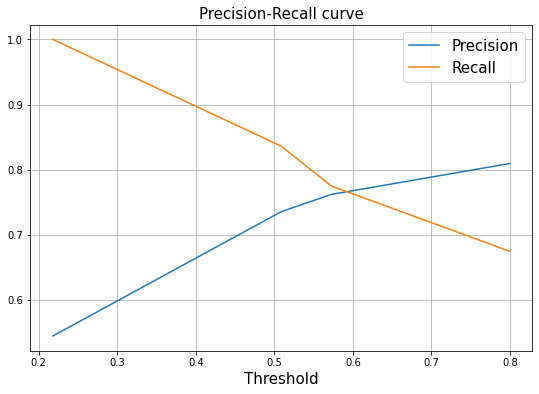

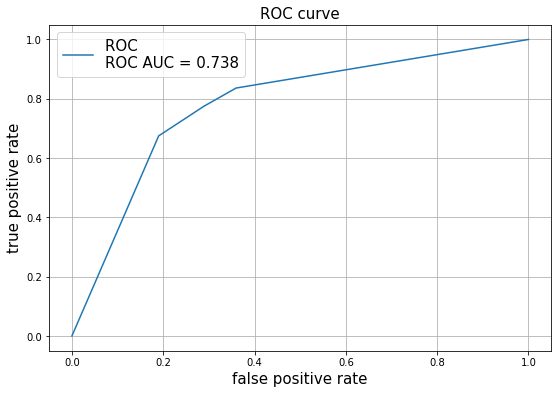

In [ ]:
# create decision tree with depth=2
small_decision_tree = tree.DecisionTreeClassifier(max_depth=2)

# training tree on training data
small_decision_tree.fit(train_data, train_labels)

predicted_labels = small_decision_tree.predict(test_data)
predict_proba = small_decision_tree.predict_proba(test_data)

# calculating metrics of our model on test data
precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
f1_score = metrics.f1_score(test_labels, predicted_labels)
log_loss = metrics.log_loss(test_labels, predicted_labels)
accuracy = metrics.accuracy_score(test_labels, predicted_labels)

print("Small decision tree")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)
print("accuracy: ", accuracy)

# precision recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predict_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


# ROC-curve
fpr, tpr, thr = roc_curve(test_labels, predict_proba[:,1])
roc_auc = roc_auc_score(test_labels, predicted_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Deep decision tree
Precision:  0.7835820895522388
Recall:  0.7701711491442543
F1-score:  0.7768187422934649
log-loss:  8.324351654401145
accuracy:  0.758988015978695


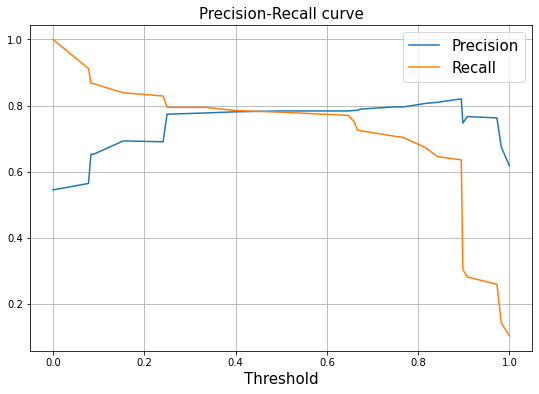

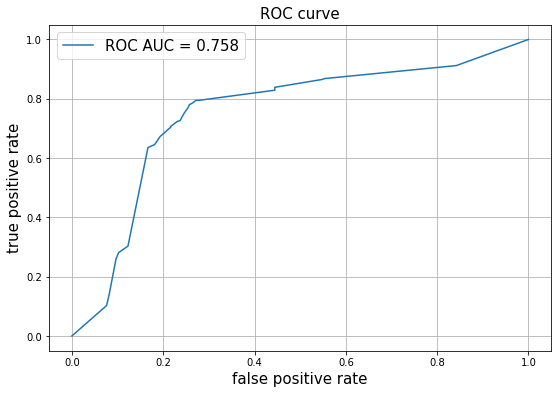

In [ ]:
deep_decision_tree = tree.DecisionTreeClassifier(max_depth=10)
deep_decision_tree.fit(train_data, train_labels)

predicted_labels = deep_decision_tree.predict(test_data)
predict_proba = deep_decision_tree.predict_proba(test_data)

precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
f1_score = metrics.f1_score(test_labels, predicted_labels)
log_loss = metrics.log_loss(test_labels, predicted_labels)
accuracy = metrics.accuracy_score(test_labels, predicted_labels)

print("Deep decision tree")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)
print("accuracy: ", accuracy)

# presicion recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predict_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# ROC-curve
fpr, tpr, thr = roc_curve(test_labels, predict_proba[:,1])
roc_auc = roc_auc_score(test_labels, predicted_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

We see, that deep decision tree works worse than small tree, most likely because of overfitting.

Small random forest
Precision:  0.7094736842105264
Recall:  0.823960880195599
F1-score:  0.7624434389140272
log-loss:  9.658127013817056
accuracy:  0.7203728362183754


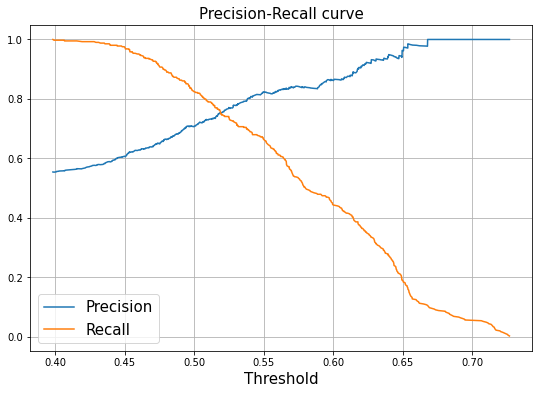

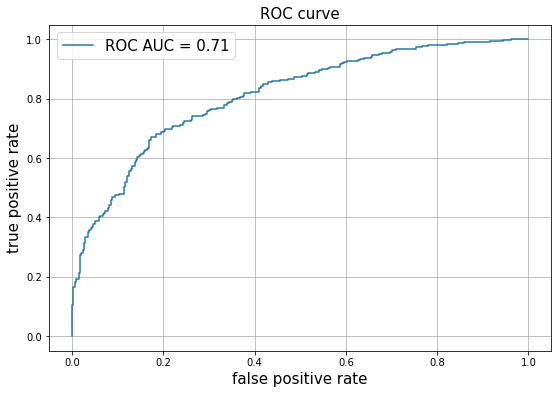

In [ ]:
# creating forest of 1000 trees each has depth=2
small_random_forest = RandomForestClassifier(n_estimators=1000, max_depth=2)
small_random_forest.fit(pd.DataFrame(train_data), pd.DataFrame(train_labels).values.ravel())

predicted_labels = small_random_forest.predict(test_data)
predict_proba = small_random_forest.predict_proba(test_data)

precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
f1_score = metrics.f1_score(test_labels, predicted_labels)
log_loss = metrics.log_loss(test_labels, predicted_labels)
acc = metrics.accuracy_score(test_labels, predicted_labels)

print("Small random forest")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)
print("accuracy: ", acc)

# presicion recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predict_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# ROC-curve
fpr, tpr, thr = roc_curve(test_labels, predict_proba[:,1])
roc_auc = roc_auc_score(test_labels, predicted_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Deep random forest
Precision:  0.8043478260869565
Recall:  0.8141809290953546
F1-score:  0.8092345078979344
log-loss:  7.220576113705491
accuracy:  0.7909454061251664


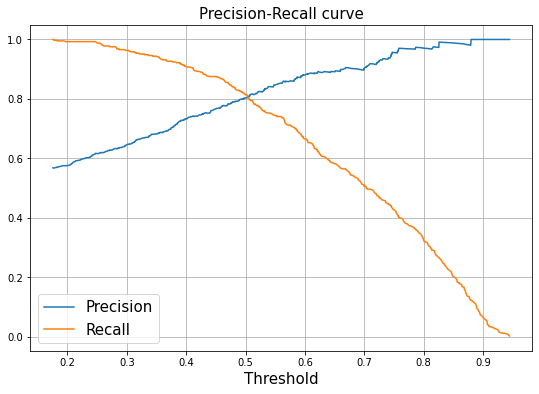

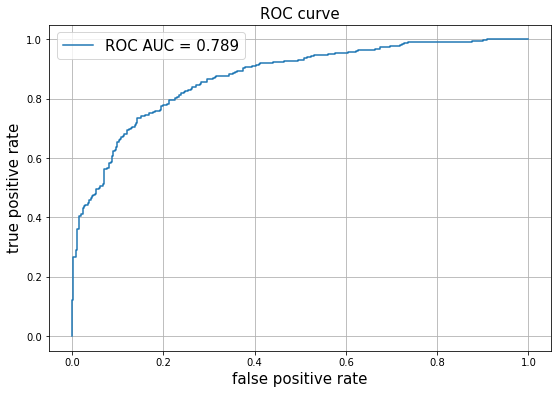

In [ ]:
# creating forest of 1000 trees each has depth=10
deep_random_forest = RandomForestClassifier(n_estimators=1000, max_depth=10)
deep_random_forest.fit(pd.DataFrame(train_data), pd.DataFrame(train_labels).values.ravel())

predicted_labels = deep_random_forest.predict(test_data)
predict_proba = deep_random_forest.predict_proba(test_data)

precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
f1_score = metrics.f1_score(test_labels, predicted_labels)
log_loss = metrics.log_loss(test_labels, predicted_labels)
acc = metrics.accuracy_score(test_labels, predicted_labels)

print("Deep random forest")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)
print("accuracy: ", acc)

# presicion recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predict_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


# ROC-curve

fpr, tpr, thr = roc_curve(test_labels, predict_proba[:,1])
roc_auc = roc_auc_score(test_labels, predicted_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

We see that deeper random forest works better. It happened because random forest give every tree small amount of data, so it is harder to overfits for them. In addition, random forest works better than decision tree according to the ROC-AUC metric. To achieve better results we could also tune parameters such as min_samples_leaf and min_samples_split.

To avoid False Negative errors we need to increase Recall metric. For this, I chose threshold equals 0.4

In [ ]:
# choose Random Forest with default parameters
clf = RandomForestClassifier()
clf.fit(train_data, train_labels)

# Classifier predict probabilites for every test item. So, if probability of
# belonging to class 1 less than 0.25 it will be class 0, otherwise it will be 
# class 1.
labels_less_FN = np.where(clf.predict_proba(test_data)[:,1] < 0.25, 0, 1)
labels_less_FN

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
precision = metrics.precision_score(test_labels, labels_less_FN)
recall = metrics.recall_score(test_labels, labels_less_FN)
f1_score = metrics.f1_score(test_labels, labels_less_FN)
log_loss = metrics.log_loss(test_labels, labels_less_FN)
acc = metrics.accuracy_score(test_labels, predicted_labels)


print("Classifier with less type II errors")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)
print('accuracy', acc)

Classifier with less type II errors
Precision:  0.6450567260940032
Recall:  0.9731051344743277
F1-score:  0.7758284600389863
log-loss:  10.578020882379054
accuracy 0.7909454061251664
